In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'SimHei'
%matplotlib inline

plt.rcParams['xtick.direction'] = 'inout'  # x軸刻度 位置
plt.rcParams['xtick.major.size'] = 3.5 # x軸刻度 長度

In [2]:
#臺中市政府警察局106年11月份交通事故資料
url_10611 = 'https://quality.data.gov.tw/dq_download_csv.php?nid=72293&md5_url=27099e7b514bec2a041fd8d0194fbd69'

#臺中市政府警察局106年10月份交通事故資料
url_10610 = 'https://quality.data.gov.tw/dq_download_csv.php?nid=59792&md5_url=351eb4516b664646e487f4b7ff5d6671'

In [3]:
# 使用pandas讀取網路連結檔案
df_10611 = pd.read_csv(url_10611)
df_10610 = pd.read_csv(url_10610)

# 使用pandas 存檔
#df_10611.to_csv('交通事故10611.csv')
#df_10610.to_csv('交通事故10610.csv')

In [ ]:
# 想利用迴圈自動合併檔案 格式問題有待解決
'''i = 10610
list1 = []
for i in range(i, 10612):
    list1.append('%s%s' %('df_', i))
    i +=1
list1
a = df_10611.append(list1)
a.tail()'''

In [4]:
# 106年 10月&11月資料合併
df = pd.concat([df_10610, df_10611], ignore_index=True)
df.loc[:, 'count'] = 1
df_m = pd.get_dummies(df.月)    #將月內的值拆開
df = df.join(df_m)    #再將拆開的欄 加回到資料集中
df = df.rename(columns={10:'10月',11:'11月'})
df.head()

,年,月,日,時,分,縣市,區,死,受傷,2-30,...,肇事因素主要,肇事逃逸,職業,旅次目的,車種,GPS座標X,GPS座標Y,count,10月,11月
0,2017,10,1,0,1,臺中市,南屯區,NaN,NaN,NaN,...,NaN,2,21,NaN,B03,24.132124,120.648291,1,1,0
1,2017,10,1,0,5,臺中市,南屯區,0.0,2.0,0.0,...,13,1,22,9,C03,24.135295,120.638802,1,1,0
2,2017,10,1,1,10,臺中市,南屯區,0.0,1.0,0.0,...,21,1,22,8,C03,24.154036,120.648631,1,1,0
3,2017,10,1,1,16,臺中市,南區,0.0,0.0,0.0,...,9,1,5,8,B03,24.129361,120.684994,1,1,0
4,2017,10,1,1,29,臺中市,西區,0.0,2.0,0.0,...,6,1,5,8,C03,24.149625,120.658176,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20171 entries, 0 to 20170
Data columns (total 52 columns):
年            20171 non-null int64
月            20171 non-null int64
日            20171 non-null int64
時            20171 non-null int64
分            20171 non-null int64
縣市           20171 non-null object
區            20171 non-null object
死            13217 non-null float64
受傷           13217 non-null float64
2-30         13217 non-null float64
天候           19048 non-null float64
光線           12026 non-null float64
道路類別         12024 non-null float64
速限           19055 non-null object
道路型態         11963 non-null float64
事故位置         11964 non-null float64
路面鋪裝         11963 non-null float64
路面狀態         11961 non-null float64
路面缺陷         11960 non-null float64
障礙物          11964 non-null float64
視距           11962 non-null float64
號誌種類         11992 non-null float64
號誌動作         11961 non-null float64
分向設施         11965 non-null float64
快車道或一般車道間    11959 non-null float64
快慢車道

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

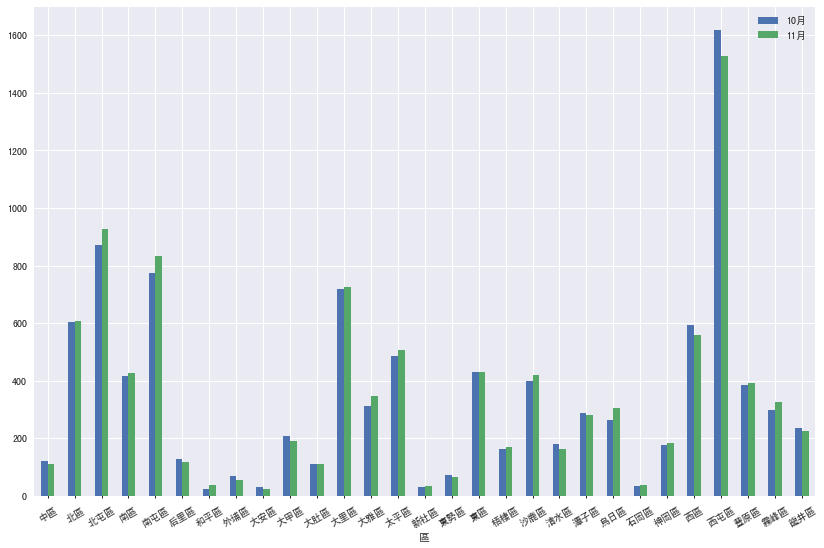

In [6]:
# 10月&11月交通事故數量比較
c = df.groupby(['區'])['10月', '11月'].sum()
c.plot(kind = 'bar', figsize=(14,9), align='center')
plt.xticks(rotation=30)

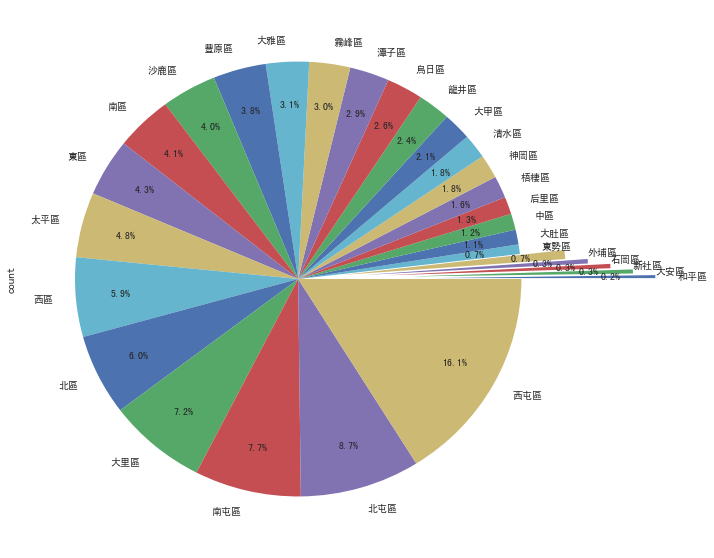

In [7]:
#10月份 交通事故各區比例
df_pie = df[df['月']==10].groupby(['區'])['count'].sum()
df_pie = df_pie.sort_values()
explode = (0.6, 0.5, 0.4, 0.3, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
df_pie.plot(kind = 'pie', explode = explode, figsize=(10, 10), autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)